In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import csv
from sklearn.manifold import MDS
# Gute Ergebnisse für DSJR500.1c fitnessBoundary=480, 1000 partcols, time limit 600
#n = 250
#n = 500
#n = 1000
n = 169
instance = "queen13_13" #DSJC1000.1 ; le450_25d ; DSJC250.5
reader = csv.reader(open(instance+".spaceAnalysis.csv", "r", encoding="ascii"), delimiter=",")
readerFitness = csv.reader(open(instance + ".spaceAnalysisFitness.csv", "r", encoding="ascii"), delimiter=",")
print('done')

FileNotFoundError: [Errno 2] No such file or directory: 'queen13_13.spaceAnalysis.csv'

In [426]:
result = np.array(list(reader)).astype(np.float)
fitness = np.array(list(readerFitness)).astype(np.float)[0]
print(result)
#print(fitness)

[[  0. 105. 106. ... 108. 109. 109.]
 [105.   0.   0. ... 109. 111. 113.]
 [106.   0.   0. ... 110. 112. 114.]
 ...
 [108. 109. 110. ...   0.   2.   4.]
 [109. 111. 112. ...   2.   0.   0.]
 [109. 113. 114. ...   4.   0.   0.]]


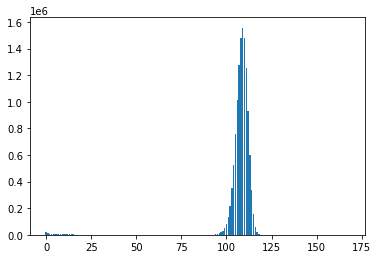

In [427]:
x = np.arange(n)
y = np.zeros(n)
for i in range(0,len(result)):
    for j in range(i+1, len(result)):
        y[int(result[i][j])] += 1

# Make the Chart
plt.bar(x, y)

# Show the Chart
plt.show()

In [428]:
embedding = MDS(n_components=3, metric=True, n_init=1, max_iter=20, verbose=0, eps=0.0025, n_jobs=None, random_state=None, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(result)
x_vals = X_transformed[:,0]
y_vals = X_transformed[:,1]
z_vals = X_transformed[:,2]
it = np.arange(1,len(result)+1)

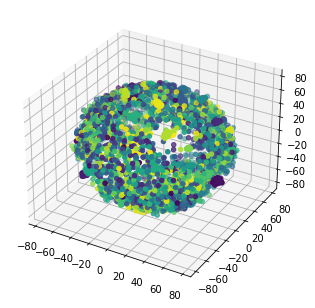

In [429]:
fig = pyplot.figure()
ax = Axes3D(fig)
p = ax.scatter(x_vals, y_vals, z_vals, c=it, label=it)

# Add a colorbar
fig.colorbar(p)

plt.show()

In [430]:
embedding = MDS(n_components=2, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.0025, n_jobs=None, random_state=None, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(result)
x_vals = X_transformed[:,0]
y_vals = X_transformed[:,1]

/usr/local/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


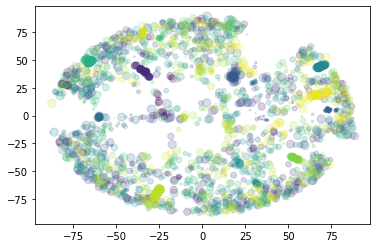

In [431]:
plt.scatter(x_vals, y_vals, z_vals, c=it, label=it, alpha=0.2)
plt.show()